In [30]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/portfolio.csv')

print(df.head())

   CustomerID  Shopping Basket  Gender  Age         Store Type  \
0    20358063            48.81    Male   26  Convenient Stores   
1    24635139            33.44  Female   33         Superstore   
2    27584479           131.57    Male   56             Online   
3    28008212            20.02    Male   27  Convenient Stores   
4    29130973            95.54  Female   55             Online   

   Value Products  Brand Products  Top Fresco Products  
0               8               2                    1  
1               6               5                    1  
2              35               8                   12  
3               0               1                    1  
4              38              18                   20  


In [31]:
# 1. Normalize and encode the DataFrame
# Identify categorical and numerical columns
categorical_features = ['Gender', 'Store Type']
numerical_features = ['Age', 'Value Products', 'Brand Products', 'Top Fresco Products']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define features and target
X = df[numerical_features + categorical_features]
y = df['Shopping Basket']

In [32]:
# 2. Split the DataFrame into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit and transform the data using the preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

Mean Squared Error: 454.20931070609817
R^2 Score: 0.6766694023855973


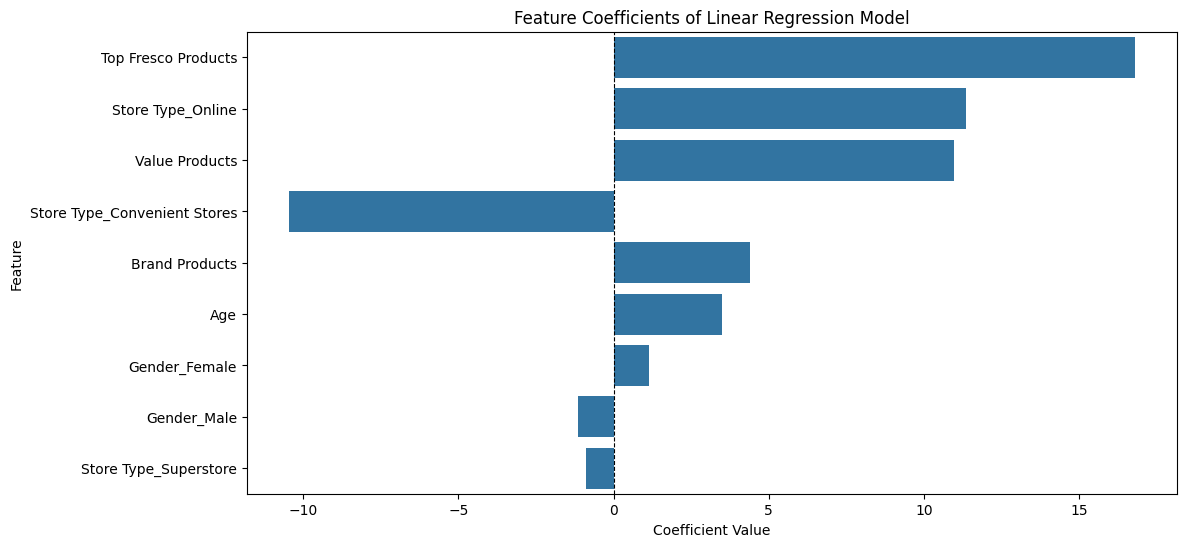

In [33]:
# 3. Fit a Linear Regression Model
model = LinearRegression(fit_intercept=True)
model.fit(X_train_transformed, y_train)

# 4. Plot the Feature Coefficients
# Get feature names after one-hot encoding
y_pred = model.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Get feature names after one-hot encoding
feature_names = (numerical_features + 
                 list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)))

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})

# Sort coefficients by absolute value
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Feature Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Line at y=0 for reference
plt.show()

In [34]:
df['class'] = np.where(df['Shopping Basket'] > 50, 1, 0)

# Display the updated DataFrame
print(df.head())

   CustomerID  Shopping Basket  Gender  Age         Store Type  \
0    20358063            48.81    Male   26  Convenient Stores   
1    24635139            33.44  Female   33         Superstore   
2    27584479           131.57    Male   56             Online   
3    28008212            20.02    Male   27  Convenient Stores   
4    29130973            95.54  Female   55             Online   

   Value Products  Brand Products  Top Fresco Products  class  
0               8               2                    1      0  
1               6               5                    1      0  
2              35               8                   12      1  
3               0               1                    1      0  
4              38              18                   20      1  


                     Accuracy  Precision    Recall   Confusion Matrix
Logistic Regression  0.956522   0.933333  1.000000  [[8, 1], [0, 14]]
Perceptron           0.956522   0.933333  1.000000  [[8, 1], [0, 14]]
Naive Bayes          0.826087   1.000000  0.714286  [[9, 0], [4, 10]]


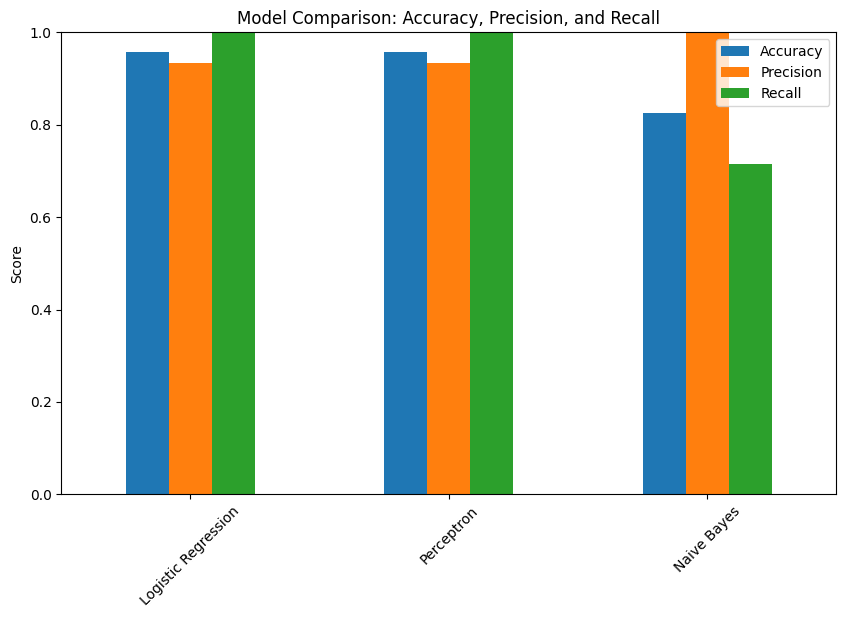

In [38]:
# Define features and target
X = df.drop(columns=['CustomerID', 'Shopping Basket', 'class'])  # Exclude non-predictive columns
y = df['class']

# 1. Perform a 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Create a preprocessor with OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Value Products', 'Brand Products', 'Top Fresco Products']),
        ('cat', OneHotEncoder(), ['Gender', 'Store Type'])
    ])

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, precision, recall, cm

# 3. Evaluate Logistic Regression
log_reg_model = LogisticRegression()
log_reg_metrics = evaluate_model(log_reg_model, X_train_transformed, y_train, X_test_transformed, y_test)

# 4. Evaluate Perceptron
perceptron_model = Perceptron()
perceptron_metrics = evaluate_model(perceptron_model, X_train_transformed, y_train, X_test_transformed, y_test)

# 5. Evaluate Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_metrics = evaluate_model(naive_bayes_model, X_train_transformed, y_train, X_test_transformed, y_test)

# Display metrics
models = ['Logistic Regression', 'Perceptron', 'Naive Bayes']
metrics = [log_reg_metrics, perceptron_metrics, naive_bayes_metrics]

# Create a DataFrame for easier visualization
results_df = pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall', 'Confusion Matrix'], index=models)

print(results_df)

# Plotting the metrics
results_df[['Accuracy', 'Precision', 'Recall']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: Accuracy, Precision, and Recall')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


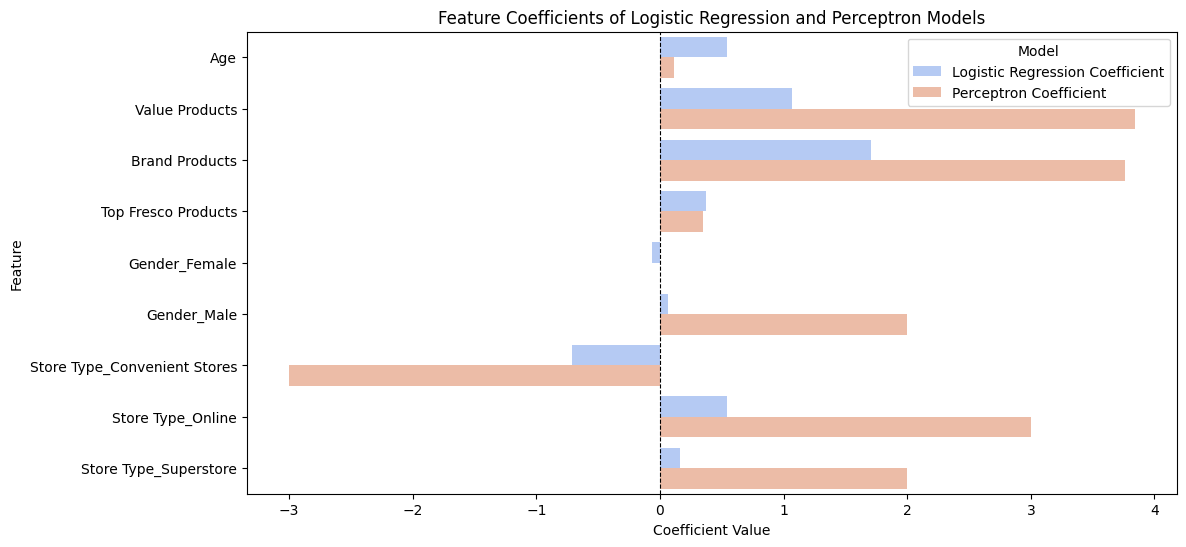

In [40]:
# Logistic Regression coefficients
log_reg_coefficients = log_reg_model.coef_[0]

# Perceptron coefficients
perceptron_coefficients = perceptron_model.coef_[0]

# Get feature names after one-hot encoding
feature_names = (['Age', 'Value Products', 'Brand Products', 'Top Fresco Products'] +
                 list(preprocessor.transformers_[1][1].get_feature_names_out(['Gender', 'Store Type'])))

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Logistic Regression Coefficient': log_reg_coefficients,
    'Perceptron Coefficient': perceptron_coefficients,
})

# Melt the DataFrame for easier plotting
coefficients_melted = coefficients_df.melt(id_vars='Feature', var_name='Model', value_name='Coefficient')

# Plotting the coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', hue='Model', data=coefficients_melted, palette='coolwarm')
plt.title('Feature Coefficients of Logistic Regression and Perceptron Models')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Line at y=0 for reference
plt.legend(title='Model')
plt.show()